# Navigation World MDP [1]

In [1]:
# Other Imports.
from simple_rl.tasks import NavigationWorldMDP
from simple_rl.agents import QLearningAgent
from simple_rl.planning import ValueIteration
from simple_rl.tasks.grid_world.GridWorldStateClass import GridWorldState
from simple_rl.tasks.navigation.NavigationStateClass import NavigationWorldState

# Python Imports.
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

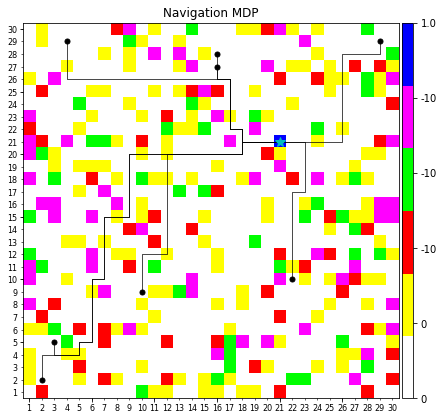

In [2]:
np.random.seed(0)
nvmdp = NavigationWorldMDP(width=30, height=30, 
                      nav_cell_types=['white', 'yellow', 'red', 'lime', 'magenta'],
                      nav_cell_rewards=[0, 0, -10, -10, -10],
                      nav_cell_p_or_locs=[0.68, 0.17, 0.05, 0.05, 0.05],
                      goal_cell_locs=[[(21,21)]],
                      goal_cell_rewards=[1.],
                      goal_cell_types=["blue"],
                      slip_prob=0.00, step_cost=0.0, gamma=.99)
traj_states_list, traj_action_list = nvmdp.sample_trajectories(n_traj=8, horizon=100, 
                                                               init_states=[NavigationWorldState(2,2)],
                                                               init_cell_types=["white"], init_unique=True,
                                                               rand_init_to_match_n_traj=True)
nvmdp.visualize_grid(trajectories=traj_states_list, show_colorbar=True, show_rewards_colorbar=True, goal_marker="*c")

## Features used for short horizon

In [3]:
print("Sample State Trajectory Features: \nind:<{}>, dist:<{}>, dist:<{}>\n".format(
                                ", ".join(nvmdp.combined_cell_types), 
                                ", ".join(nvmdp.combined_cell_types), 
                                ", ".join(nvmdp.goal_cell_types)))
[nvmdp.feature_at_state(s,
                        feature_type="indicator",
                        incl_cell_distances=True,
                        incl_goal_indicator=False,
                        incl_goal_distances=True,
                        normalize_distance=False, dtype=np.float).tolist() for s in traj_states_list[0]]

Sample State Trajectory Features: 
ind:<white, yellow, red, lime, magenta, blue>, dist:<white, yellow, red, lime, magenta, blue>, dist:<blue>



[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 5.0, 7.0, 38.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 4.0, 6.0, 37.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3.0, 3.0, 5.0, 36.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3.0, 2.0, 6.0, 35.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 1.0, 7.0, 34.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 2.0, 6.0, 33.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 5.0, 32.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 2.0, 4.0, 31.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 3.0, 3.0, 30.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 4.0, 3.0, 29.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3.0, 5.0, 2.0, 28.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 4.0, 6.0, 1.0, 27.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 4.0, 5.0, 1.0, 26.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 3.0, 5.0, 1.0, 25.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 4.0, 1.0, 24.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3.0, 5.0, 1.0, 23.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 3.0, 6.0, 2.0, 22.0

## Features used for long horizon

In [4]:
print("Sample State Trajectory Features: \nind:<{}>, dist:<{}>, dist:<{}>\n".format(
                                ", ".join(nvmdp.combined_cell_types), 
                                ", ".join(nvmdp.combined_cell_types), 
                                ", ".join(nvmdp.goal_cell_types)))
[nvmdp.feature_at_state(s,
                        feature_type="indicator",
                        incl_cell_distances=False,
                        incl_goal_indicator=False,
                        incl_goal_distances=True,
                        normalize_distance=False, dtype=np.float).tolist() for s in traj_states_list[0]]

Sample State Trajectory Features: 
ind:<white, yellow, red, lime, magenta, blue>, dist:<white, yellow, red, lime, magenta, blue>, dist:<blue>



[[1.0, 0.0, 0.0, 0.0, 0.0, 38.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 37.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 36.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 35.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 34.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 33.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 32.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 31.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 30.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 29.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 28.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 27.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 26.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 25.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 24.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 23.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 22.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 21.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 20.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 19.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 18.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 17.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 16.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 15.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 14.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 13.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 12.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 11.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 10.0],
 [1.0, 0.0, 0.

## Multiple Goals

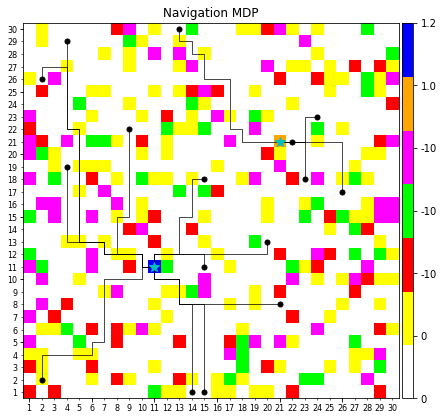

Sample State Trajectory


[[0.0, 1.0, 0.0, 0.0, 0.0, 38.0, 18.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 37.0, 17.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 36.0, 16.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 35.0, 15.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 34.0, 14.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 33.0, 13.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 32.0, 12.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 31.0, 11.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 30.0, 10.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 29.0, 9.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 28.0, 8.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 27.0, 7.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 26.0, 6.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 25.0, 5.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 24.0, 4.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 23.0, 3.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 22.0, 2.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 21.0, 1.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 0.0]]

In [5]:
np.random.seed(0)
nvmdp = NavigationWorldMDP(width=30, height=30, 
                      nav_cell_types=['white', 'yellow', 'red', 'lime', 'magenta'],
                      nav_cell_rewards=[0, 0, -10, -10, -10],
                      nav_cell_p_or_locs=[0.68, 0.17, 0.05, 0.05, 0.05],
                      goal_cell_locs=[[(21,21)], [(11,11)]],
                      goal_cell_rewards=[1., 1.2],
                      goal_cell_types=["orange","blue"],
                      slip_prob=0.00, step_cost=0.0, gamma=.95)
traj_states_list, traj_action_list = nvmdp.sample_trajectories(n_traj=16, horizon=100, 
                                                               init_states=[NavigationWorldState(2,2)],
                                                               init_cell_types=["white"], init_unique=True,
                                                               rand_init_to_match_n_traj=True)
nvmdp.visualize_grid(trajectories=traj_states_list, show_colorbar=True, show_rewards_colorbar=True, goal_marker="*c")
## Features: <Cell Type Ind, Goal Distances>
print("Sample State Trajectory")
[nvmdp.feature_at_state(s,
                        feature_type="indicator",
                        incl_cell_distances=False,
                        incl_goal_indicator=False,
                        incl_goal_distances=True,
                        normalize_distance=False, dtype=np.float).tolist() for s in traj_states_list[0]]

## Custom Grid

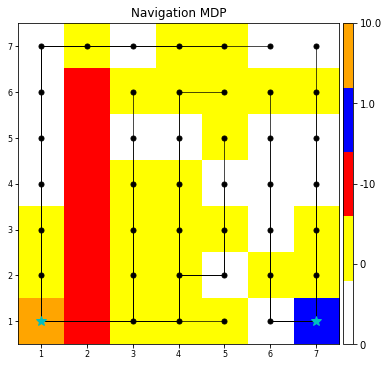

In [6]:
nvmdp = NavigationWorldMDP(width=7, height=7,
                      nav_cell_types=['white', 'yellow', 'red'],
                      nav_cell_rewards=[0, 0, -10],
                      nav_cell_p_or_locs=[0.5, 0.5, [(2,i) for i in range(1,7)]],
                      goal_cell_locs=[[(7,1)],[(1,1)]],
                      goal_cell_types=["blue", "orange"],
                      goal_cell_rewards=[1.,10.],
                      slip_prob=0.00, step_cost=0.0, gamma=.50)
traj_states_list, traj_action_list = nvmdp.sample_trajectories(n_traj=41, horizon=100, 
                                                               init_states=[NavigationWorldState(1,2)],
                                                               init_cell_types=["white", "yellow"], init_unique=True,
                                                               rand_init_to_match_n_traj=False)
nvmdp.visualize_grid(trajectories=traj_states_list, show_colorbar=True, show_rewards_colorbar=True, goal_marker="*c")

## Updating Goals dynamically

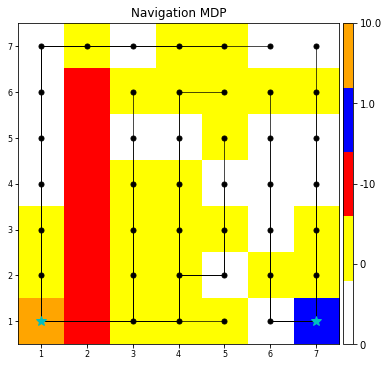

In [7]:
# nvmdp._reset_goals([[(7,1)],[(1,1)]],[10.,1.],["blue", "orange"])
traj_states_list, traj_action_list = nvmdp.sample_trajectories(n_traj=41, horizon=100, 
                                                               init_states=None,
                                                               init_cell_types=["white", "yellow"], init_unique=True,
                                                               rand_init_to_match_n_traj=False)
nvmdp.visualize_grid(trajectories=traj_states_list, show_colorbar=True, show_rewards_colorbar=True, goal_marker="*c")

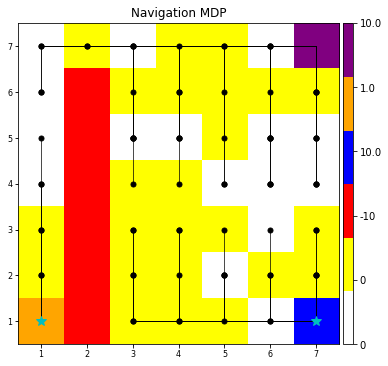

In [8]:
nvmdp._reset_goals([[(7,1)],[(1,1)],[(7,7)]],[10.,1.,10.],["blue", "orange","purple"])
traj_states_list, traj_action_list = nvmdp.sample_trajectories(n_traj=41, horizon=100, 
                                                               init_states=None,
                                                               init_cell_types=["white", "yellow"], init_unique=True,
                                                               rand_init_to_match_n_traj=True)
nvmdp.visualize_grid(trajectories=traj_states_list, show_colorbar=True, show_rewards_colorbar=True, goal_marker="*c")

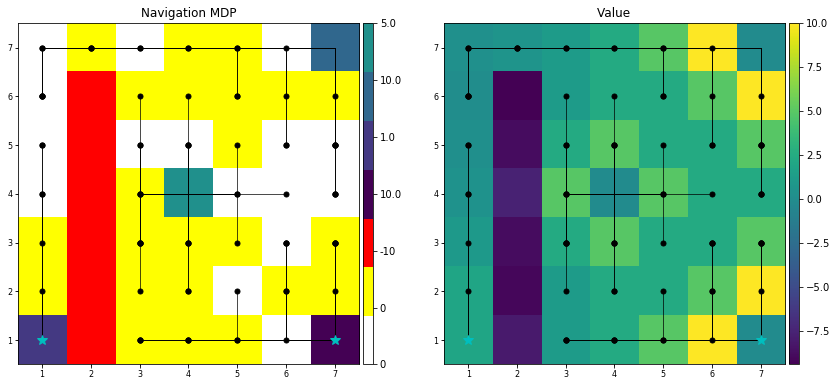

In [9]:
nvmdp._reset_goals([[(7,1)],[(1,1)],[(7,7)],[(4,4)]], [10.,1.,10.,5.],list(range(4)))
traj_states_list, traj_action_list = nvmdp.sample_trajectories(n_traj=41, horizon=100, 
                                                               init_states=None,
                                                               init_cell_types=["white", "yellow"], init_unique=True,
                                                               rand_init_to_match_n_traj=True)
plt.figure(figsize=(14,8))
nvmdp.visualize_grid(trajectories=traj_states_list, show_colorbar=True, show_rewards_colorbar=True, goal_marker="*c", new_fig=False, subplot_str="121")
nvmdp.visualize_grid(nvmdp.get_value_grid(), trajectories=traj_states_list, show_colorbar=True, show_rewards_colorbar=False, goal_marker="*c", new_fig=False, subplot_str="122", 
                     state_space_cmap=False, title="Value")

## Updating Rewards dynamically

In [10]:
nvmdp.nav_cell_rewards, nvmdp.goal_cell_rewards

([0, 0, -10], [10.0, 1.0, 10.0, 5.0])

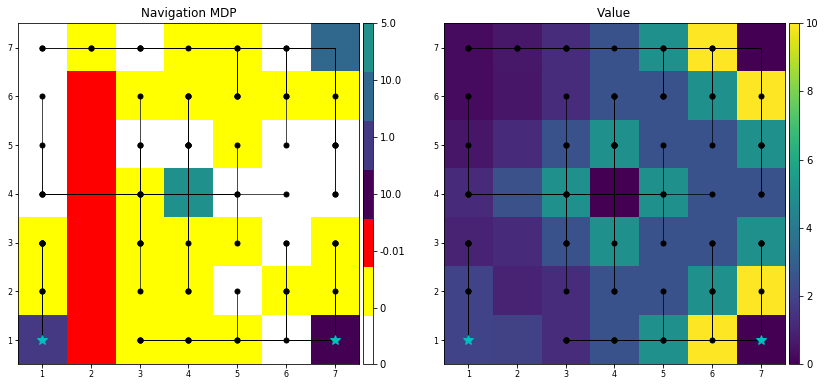

In [11]:
nvmdp._reset_rewards([0, 0, -0.01], [], [10., 1.0, 10., 5.])
traj_states_list, traj_action_list = nvmdp.sample_trajectories(n_traj=41, horizon=100, 
                                                               init_states=None,
                                                               init_cell_types=["white", "yellow"], init_unique=True,
                                                               rand_init_to_match_n_traj=True)
plt.figure(figsize=(14,8))
nvmdp.visualize_grid(trajectories=traj_states_list, show_colorbar=True, show_rewards_colorbar=True, goal_marker="*c", new_fig=False, subplot_str="121")
nvmdp.visualize_grid(nvmdp.get_value_grid(), trajectories=traj_states_list, show_colorbar=True, show_rewards_colorbar=False, goal_marker="*c", new_fig=False, subplot_str="122", 
                     state_space_cmap=False, title="Value")

## Reference

[1] MacGlashan, James, and Michael L. Littman. "Between Imitation and Intention Learning." IJCAI. 2015.